# HEALTH INSURANCE PREDICTION

In [6]:
#Libraries Used :
    #PANDAS, NUMPY, MATPLOTLIB, SEABORN, SKLEARN ,PICKLE, STREAMLIT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle
import streamlit as st

In [5]:
#IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#  READING CSV FILE :
insurance = pd.read_csv("C://Users//Lenovo//Desktop//Health insurance//insurance.csv")

In [8]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# DATA UNDERSTANDING

In [4]:
# GETTING FIRST 10 RECORDS :
insurance.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [5]:
# RETRIVING SUMMARY OF DATA :
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# COUNT OF NUMBER OF ROWS :
print('----------------------------- ')
print("    TOTAL NUMBER OF ROWS     " )
print('----------------------------- ')
print("          ",insurance.shape[0])

----------------------------- 
    TOTAL NUMBER OF ROWS     
----------------------------- 
           1338


In [7]:
# COUNT OF NUMBER OF COLUMNS :
print('----------------------------- ')
print("   TOTAL NUMBER OF COLUMNS     " )
print('----------------------------- ')
print("             ",insurance.shape[1])

----------------------------- 
   TOTAL NUMBER OF COLUMNS     
----------------------------- 
              7


In [8]:
# RETRIVING STATISTICAL SUMMARY OF DATA :
print('-------------------------------------------------------- ')
print("                 STATISTICAL SUMMARY                     " )
print('-------------------------------------------------------- ')
print(insurance.describe())

-------------------------------------------------------- 
                 STATISTICAL SUMMARY                     
-------------------------------------------------------- 
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# DATA PROCESSING/ EDA

In [9]:
# CHECKING THE ZERO VALUES :
print(' ------------------------')
print("       ZERO VALUES       ")
print(' ------------------------')
(insurance==0).sum()

2022-04-29 17:42:17.537 INFO    numexpr.utils: NumExpr defaulting to 2 threads.


 ------------------------
       ZERO VALUES       
 ------------------------


age           0
sex           0
bmi           0
children    574
smoker        0
region        0
charges       0
dtype: int64

In [10]:
Here the children is showing zero values as 574 .

But the 0 values in childrens column represents the Beneficiary is having no Childrens.

Therefore, it is not a zero or missing value. So we canot adjust/fill or manipulate the value.

SyntaxError: invalid syntax (<ipython-input-10-edf1e05e5dc2>, line 1)

In [11]:
# CHECKING THE MISSING VALUES :
print(' ------------------------')
print("       MISSING VALUES       ")
print(' ------------------------')
insurance.isnull().sum()

 ------------------------
       MISSING VALUES       
 ------------------------


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
The data does not contains any missing or NaN values present.
Therefore, the is no need of adjusting/fillingg or manipulating the data.

SyntaxError: invalid syntax (<ipython-input-12-19e4444a2cb8>, line 1)

# VISUAL DATA ANALYSIS

<Figure size 864x576 with 0 Axes>

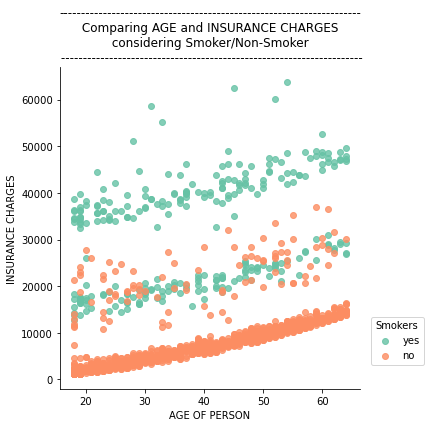

In [13]:
# PLOTTING A SCATTER PLOT :

plt.figure(figsize=(12,8))
sns.lmplot(x='age', y='charges', data=insurance, fit_reg=False, hue='smoker', palette='Set2', legend=False)
plt.xlabel('AGE OF PERSON')
plt.ylabel('INSURANCE CHARGES')
plt.title('---------------------------------------------------------------------\n Comparing AGE and INSURANCE CHARGES \n considering Smoker/Non-Smoker \n ---------------------------------------------------------------------')
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='center left' , title ='Smokers')
plt.show()

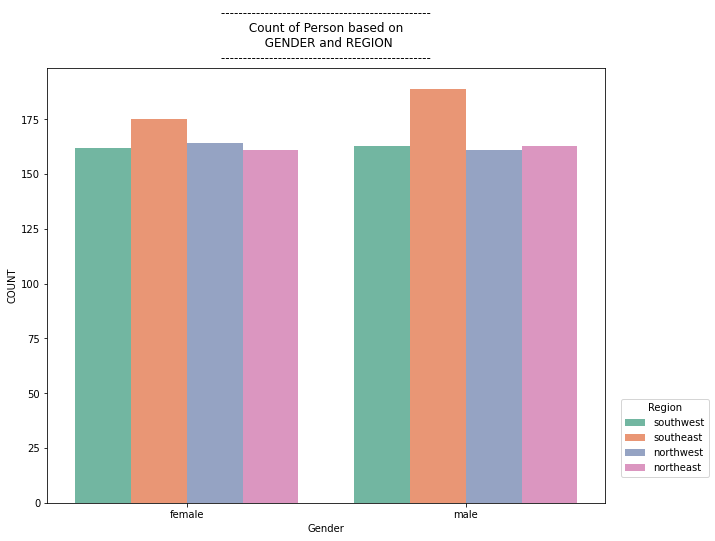

In [14]:
# PlOTTING A BAR PLOT :

plt.figure(figsize=(10,8))
sns.countplot(x='sex', data=insurance, hue='region',palette='Set2')
plt.xlabel('Gender')
plt.ylabel('COUNT')
plt.title(" ------------------------------------------------ \n Count of Person based on \n  GENDER and REGION \n ------------------------------------------------ ")
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='center left' , title ='Region')
plt.show()

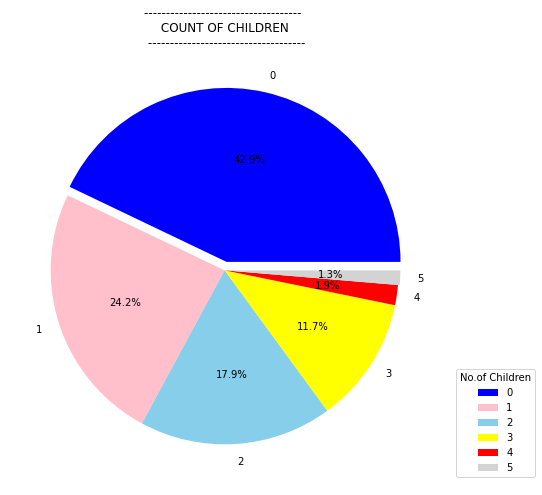

In [15]:
# PLOTTING A PIE CHART :

plt.figure(figsize=(13,8))
size=insurance['children'].value_counts()
labels=np.unique(insurance.children)
colors=['blue','pink','skyblue','yellow','red','lightgray']
explode=(0.05,0,0,0,0,0.01)
plt.pie(size, labels = labels,autopct='%1.1f%%', colors=colors , explode=explode)
plt.title("------------------------------------ \n COUNT OF CHILDREN \n ------------------------------------")
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='center left' , title ='No.of Children')

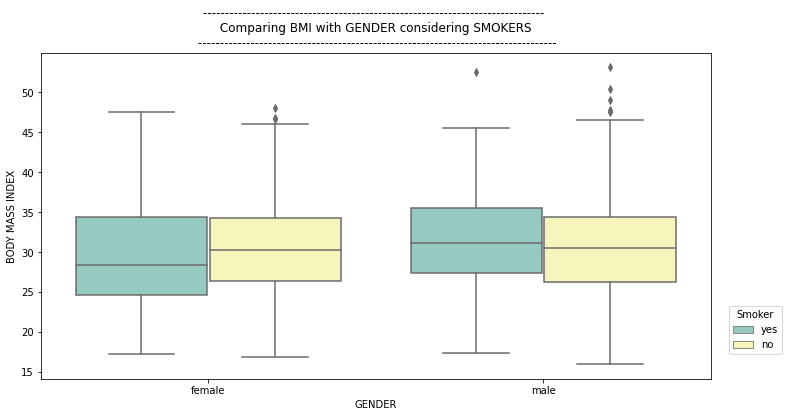

In [16]:
# PLOTTING BOX PLOT :

plt.figure(figsize=(12,6))
sns.boxplot(x="sex",y=insurance["bmi"], hue= 'smoker', data=insurance ,palette='Set3' )
plt.title("------------------------------------------------------------------------------ \n Comparing BMI with GENDER considering SMOKERS \n ----------------------------------------------------------------------------------")
plt.xlabel("GENDER")
plt.ylabel("BODY MASS INDEX")
plt.legend(bbox_to_anchor=(1.02, 0.15), loc='center left' , title ='Smoker')

In [17]:
GROUPING OF CHILDRENS INTO FAMILY SIZE SO AS TO PLOT THE CHART ACCORDINGLY

SyntaxError: invalid syntax (<ipython-input-17-cbf5c1141cba>, line 1)

In [ ]:
# GROUPING AND PLOTTING :

plt.figure(figsize=(13,6))
bins=[1,2,3,4]
labels = ['Small_Family','Medium_Family','Large_Family']
insurance['children_family'] = pd.cut(insurance['children'],bins=bins, labels=labels)
sns.boxplot(x ='children_family',y='charges', data = insurance , palette ='Set2')
plt.title(" --------------------------------------------------------------------------- \n Comparing FAMILY TYPE based on INSURANCE CHARGES  \n ---------------------------------------------------------------------------")
plt.xlabel("FAMILY SIZE DEPENDED ON CHILDREN")
plt.ylabel(" INSURANCE CHARGES")

In [ ]:
# PLOTTTING A HEAT MAP :

plt.figure(figsize=(7,5))

cmap="tab20"
center=0
annot= True

sns.heatmap(insurance.corr(),cmap=cmap,annot=annot)
plt.title("------------------------------------------------------\n Correlation of Numerical Variables \n ------------------------------------------------------")
plt.show()

In [ ]:
# GETTING COLUMN NAME :

print('---------------------------------------')
print('           UNIQUE COLUMN NAMES         ')
print('---------------------------------------')
print(insurance.columns)

In [18]:
# DROPPING THE CHILDREN_FAMILY COLUMN :

print('---------------------------------------')
print('           ADJUSTED COLUMN        ')
print('---------------------------------------')
insurance.drop('children_family', axis=1, inplace=True)
print(insurance.columns)

---------------------------------------
           ADJUSTED COLUMN        
---------------------------------------


KeyError: "['children_family'] not found in axis"

In [ ]:
# GETTING DATA TYPE OF COLUMN :
print('---------------------------------------')
print('           DATA TYPE OF COLUMN        ')
print('---------------------------------------')
print( insurance.dtypes)

In [ ]:
Here age, bmi , charges is numerical type we do not need to manipulate it.
But sex, smoker , region are of category type we need to make further changes so to proceed with model building.

In [19]:
# GETTING THE COUNT OF OBJECT DATA TYPE COLUMN :

print('--------------------------------------------')
print('           COUNT OF OBJECT DATA TYPE          ')
print('--------------------------------------------')
for col in ['sex', 'smoker', 'region']:
    print( "-------------------------\n The columns is "+ col,':' + "\n -------------------------- ")
    print(insurance[col].value_counts())
    

--------------------------------------------
           COUNT OF OBJECT DATA TYPE          
--------------------------------------------
-------------------------
 The columns is sex :
 -------------------------- 
male      676
female    662
Name: sex, dtype: int64
-------------------------
 The columns is smoker :
 -------------------------- 
no     1064
yes     274
Name: smoker, dtype: int64
-------------------------
 The columns is region :
 -------------------------- 
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


# ENCODING THE DATA 

In [20]:
Enoding the data as :
    Sex       = Female    : 0        Male      : 1
    Smoker    = No        : 0        Yes       : 1
    Region    = NorthEast : 0        NorthWest : 1        SouthEast : 2        SouthWest : 4

SyntaxError: invalid syntax (<ipython-input-20-9a2b4014c02f>, line 1)

In [21]:
# Importing Libraries for PROCESSING & ENCODING :

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [22]:
# Encoding the object column (SEX, SMOKER, REGION) : 

for col in ['sex', 'smoker', 'region']:
    if (insurance[col].dtype == 'object'):
        le = preprocessing.LabelEncoder()
        le = le.fit(insurance[col])
        insurance[col] = le.transform(insurance[col])
        print('Encoding Completed for Column : ',col)

Encoding Completed for Column :  sex
Encoding Completed for Column :  smoker
Encoding Completed for Column :  region


In [23]:
# Printing tail value of the encoded data :

insurance.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,0,24.225,2,0,0,22395.74424
1329,52,1,38.600,2,0,3,10325.20600
1330,57,0,25.740,2,0,2,12629.16560
1331,23,0,33.400,0,0,3,10795.93733
1332,52,0,44.700,3,0,3,11411.68500
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500
1337,61,0,29.070,0,1,1,29141.36030


In [24]:
# Saving the Encoded data in csv format :

insurance.to_csv('insurance_encode.csv',index = False)

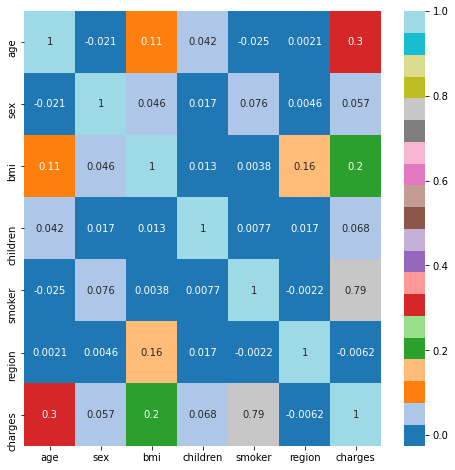

In [25]:
# Getting the Co-relation by using heat map of all columns :

plt.figure(figsize=(8,8))

#setting the parameter values
cmap="tab20"
center=0

#setting the parameter values
annot= True

#plotting the heatmap
hm=sns.heatmap(insurance.corr(),cmap=cmap,annot=annot)

#displaying the plotted heatmap
plt.show()

# MODEL PROCESSING

In [26]:
# Splitting the Features and Target Variables :

x = insurance.drop(columns='charges', axis=1)
y = insurance['charges']

In [27]:
print(x),print(y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


(None, None)

In [28]:
# Splitting the data into Training data & Testing Data :

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [29]:
# Printing Shape of X :

print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# LINEAR REGRESSION MODEL 

In [30]:
MODEL TRAINING

SyntaxError: invalid syntax (<ipython-input-30-cddf8eac02a0>, line 1)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [32]:
# loading the Linear Regression model
reg = LinearRegression()

In [33]:
reg.fit(x_train, y_train)

LinearRegression()

In [34]:
#MODEL EVALUATION

# Prediction on Train data :

train_data_prediction =reg.predict(x_train)

In [35]:
# R squared value of Train Data :

r2_train = metrics.r2_score(y_train, train_data_prediction)
print('R squared value of Train Data : ', r2_train)

R squared value of Train Data :  0.7519923667088932


In [36]:
# Prediction on Test data :

test_data_prediction =reg.predict(x_test)

In [37]:
# R squared value of Test Data :

r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value of Test Data: ', r2_test)

R squared value of Test Data:  0.7445422986536502


In [38]:
#PREDICTIVE MODELLING SYSTEM

# Inputting the values :
input_data= (18, 1, 10.000, 4,1,2)    

# Coverting into data to numpy array so as to avoid reshape error :
input_data_as_numpy_array = np.asarray(input_data)

# Reshapping the array :
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Interpreting the Predicted Result :
result = reg.predict(input_data_reshaped)
result

array([21664.26093711])

In [39]:
# Checking the Accuracy :

accuracy = reg.score (x_test, y_test)
print(accuracy * 100, '%')  

74.45422986536502 %


# RANDOM FOREST REGRESSION 

In [40]:
# Knowing the X and y values :

print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [41]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [42]:
# MODEL TRAINING

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [43]:
# loading the Random Forest Regression model :

RFreg=RandomForestRegressor(n_estimators= 10 , random_state= 0)    
# n_estimators represents number of trees (before considering average)

In [44]:
RFreg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [45]:
# MODEL EVALUATION 

# Prediction on Train data :

train_data_prediction =RFreg.predict(x_train)

In [46]:
# Prediction on Test data :

test_data_prediction =RFreg.predict(x_test)

In [47]:
# R squared value of Train Data :

r2_train = metrics.r2_score(y_train, train_data_prediction)
print('R squared value of Train Data: ', r2_train)

R squared value of Train Data:  0.9678666565741351


In [48]:
# R squared value of Test Data :

r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared value of Test Data : ', r2_test)

R squared value of Test Data :  0.8260217536852199


In [49]:
# PREDICTIVE MODELLING SYSTEM
 Sex       = Female    : 0        Male      : 1
    Smoker    = No        : 0        Yes       : 1
    Region    = NorthEast : 0        NorthWest : 1        SouthEast : 2        SouthWest : 4

IndentationError: unexpected indent (<ipython-input-49-f460afabee18>, line 2)

In [50]:
# Inputting the values :
input_data=  (18   , 1 , 33.770, 1 ,  0 , 2)        # age, sex , bmi, children, smoker, region
# Coverting into data to numpy array so as to avoid reshape error :
input_data_as_numpy_array = np.asarray(input_data)

# Reshapping the array :
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Interpreting the Predicted Result :
result = RFreg.predict(input_data_reshaped)
result

array([1728.332275])

In [51]:
# Checking the Accuracy :

accuracy = RFreg.score (x_test, y_test)
print(accuracy * 100, '%')

82.60217536852198 %


# The Accuracy Score of Linear model is 74.45%.

# The Accuracy Score Random Forest Regression is 82.60%.


# The Random Forest Regression interprets the best accuracy.

# Therefore we will proceed with the Random Forest Regression for futher prediction process.

In [52]:
#PICKLE FILE

SyntaxError: invalid syntax (<ipython-input-52-df4171fe1bf2>, line 1)

In [53]:
import pickle
pickle.dump(RFreg,open('health_claim.pkl','wb'))